# Pymaceuticals Inc.
---

### Analysis

- The mouse data appears to be evenly distributed across the two sexes - 49% female and 51% male. Simliarly, the number of mice in each drug regimen around between 150-200 mice with the exception of Capomulin and Ramicane with both being slightly more than 200 mice. 
- Looking at the box plot analysis, Ramicane shows the smallest final tumor volume across mice suggesting perhaps it's the most effective between the 4 drugs analyzed in decreasing tumor volume. Capomulin was a close second, followed by Ceftamin and Infubinol. 
- Looking at the correlation between mouse weight and average tumor volume, there appears to be a strong correlation between the two variables with Pearson r = 0.84. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df=combined_df.loc[combined_df['Mouse ID'] == 'g989']
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df[~combined_df['Mouse ID'].isin(dup_mice_ID)]
clean_df['Drug Regimen'].nunique()

10

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
grouped1_df = clean_df.groupby('Drug Regimen')[['Drug Regimen', 'Tumor Volume (mm3)']].apply(lambda x: x.reset_index(drop=True)).reset_index(drop=True)

grouped1_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,45.000000
1,Capomulin,45.651331
2,Capomulin,43.270852
3,Capomulin,43.784893
4,Capomulin,42.731552
...,...,...
1875,Zoniferol,62.236572
1876,Zoniferol,63.281071
1877,Zoniferol,64.575222
1878,Zoniferol,45.000000


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df=clean_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.

summary_table= pd.DataFrame({"Mean Tumor Volume": mean,
                             "Median Tumor Volume": median,
                             "Tumor Volume Variance": variance,
                             "Tumor Volume Std Dev": std,
                             "Tumor Volume Std Err": sem})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggr_summary = grouped_df[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
aggr_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

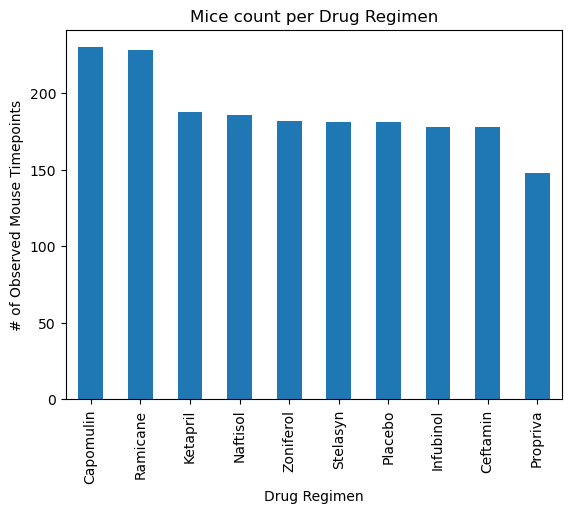

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# creating a dataframe with needed data
bar_graph= clean_df['Drug Regimen'].value_counts()
# creating a bar graph using pandas (.plot)
bar_graph.plot(kind='bar')
plt.title("Mice count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

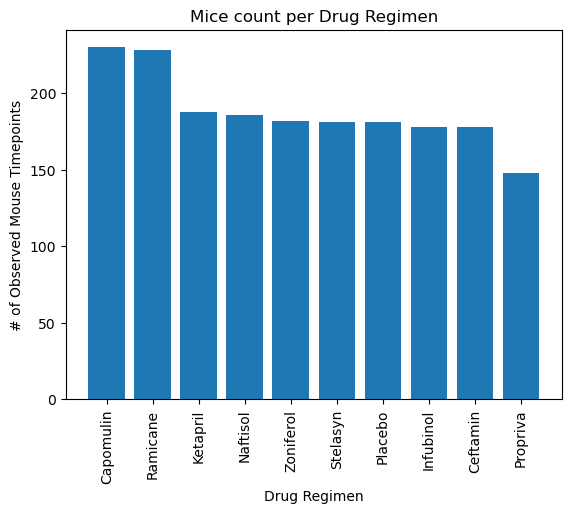

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# using came bar_graph dataframe, plotting a bar graph using pyplot
bars = bar_graph.index.values
count = bar_graph.values
plt.bar(bars, count)
plt.title("Mice count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation ="vertical")
plt.show()

Text(0.5, 1.0, 'Distribution of Sex in Mice')

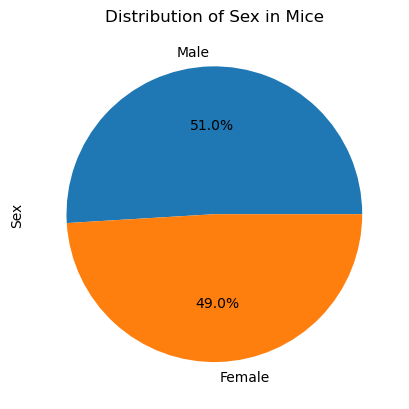

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df['Sex'].value_counts()
sex_df.plot(kind='pie', autopct = "%1.1f%%")
plt.title("Distribution of Sex in Mice")


Text(0, 0.5, 'Sex')

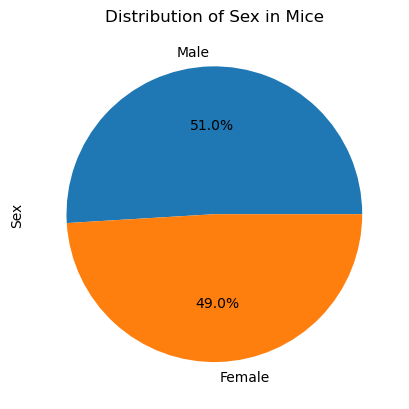

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# using the sex_df data frame, creating the labels and sizes 
sexes = sex_df.index.unique()
percent = sex_df.values
plt.pie(percent, labels = sexes, autopct = "%1.1f%%" )
plt.title("Distribution of Sex in Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(drugs)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= filtered_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint.merge(filtered_df, on=['Mouse ID', 'Timepoint'], how = 'left')

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# done before
drugs= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol = merged_df.loc[merged_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_list.append(final_vol)
    
    # add subset 
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_vol.loc[(final_vol < lower_bound)|(final_vol > upper_bound)]
    print(f"{drug}'s potenial outliers: {outliers}")

Capomulin's potenial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potenial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potenial outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potenial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


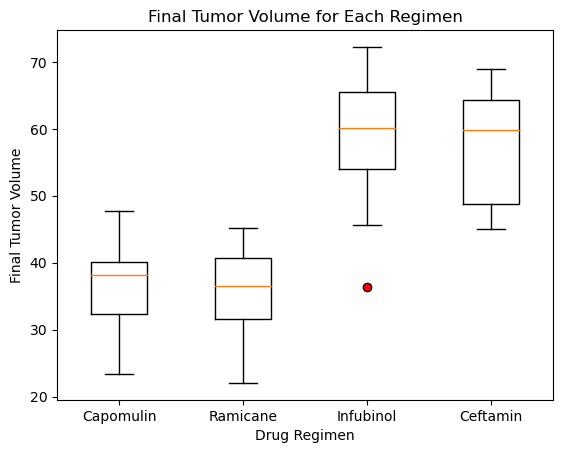

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red = dict(markerfacecolor='r')
plt.boxplot(tumor_vol_list, labels = drugs, flierprops=red)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume')
plt.title('Final Tumor Volume for Each Regimen')
plt.show()

## Line and Scatter Plots

In [17]:
# generating a dataframe for only Capomulin drug regimen 
cap_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
cap_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


Text(0.5, 1.0, 'Capomulin Treament of Mouse l509')

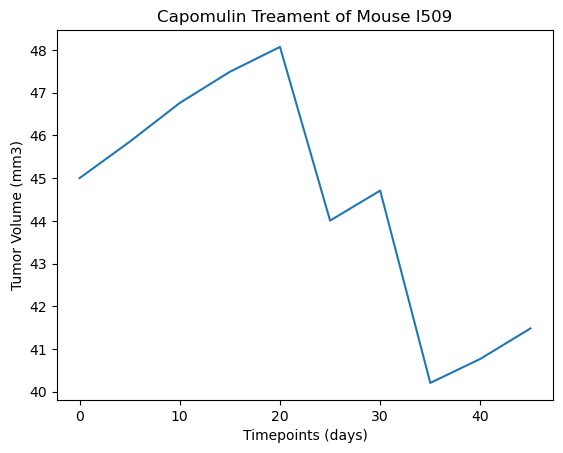

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_id= clean_df.loc[clean_df["Mouse ID"] == "l509",:]
x_axis = cap_id['Timepoint']
y_axis = cap_id["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treament of Mouse l509")

Text(0.5, 1.0, 'Average Weight vs Tumor Volume in Capomulin Treatment')

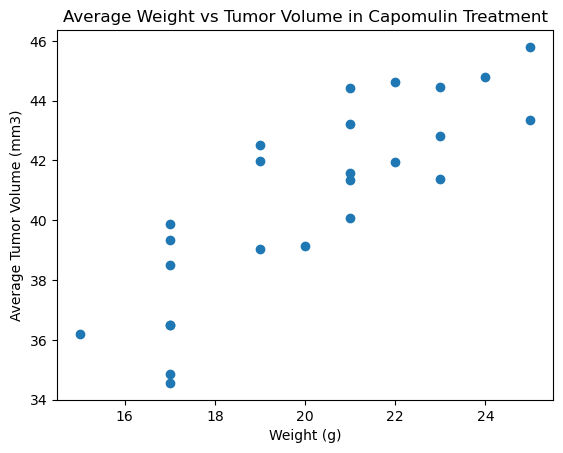

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = cap_df.groupby(['Mouse ID'])['Weight (g)'].mean()
volume = cap_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
plt.scatter(weight, volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Weight vs Tumor Volume in Capomulin Treatment")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0.5, 1.0, 'Average Weight vs Tumor Volume in Capomulin Treatment')

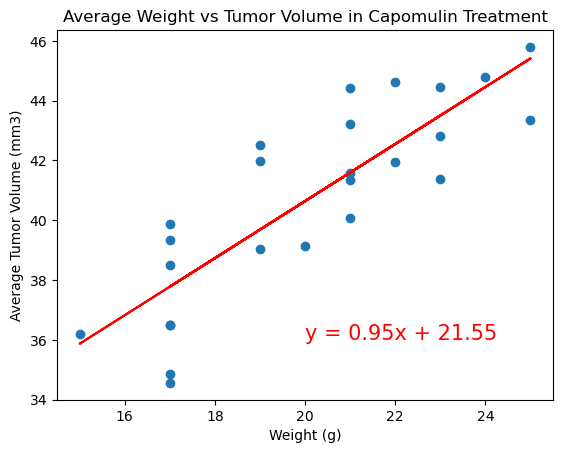

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(cap_correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red") #adding equation to graph was an additional step I added
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Weight vs Tumor Volume in Capomulin Treatment")